<a href="https://colab.research.google.com/github/grosetta/rdkit_study/blob/main/%E5%8C%96%E5%90%88%E7%89%A9%E8%81%9A%E7%B1%BB%E5%8F%8A%E7%A9%BA%E9%97%B4%E4%B8%8A%E5%8F%AF%E8%A7%86%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#文件头代码
import sys
from google.colab import drive
drive.mount('/content/gdrive')
sys.path.insert(0,"/content/gdrive/My Drive/Colab Notebooks/python_package/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 计算化合物两两之间的相似性

In [4]:
from rdkit import Chem, DataStructs
from rdkit.Chem import MACCSkeys

In [10]:
smilesDict = {
        "水杨酸": "c1ccc(c(c1)C(=O)O)O",
        "乙酰水杨酸": "O=C(Oc1ccccc1C(=O)O)C",
        "对乙酰氨基酚": "CC(=O)NC1=CC=C(C=C1)O"}
 
molDict = {name: Chem.MolFromSmiles(smiles) for name, smiles in smilesDict.items()}
fpDict = {name: MACCSkeys.GenMACCSKeys(mol) for name, mol in molDict.items()}

In [11]:
for nameA, fpA in fpDict.items():
    for nameB, fpB in fpDict.items():
        tanimoto = DataStructs.FingerprintSimilarity(fpA, fpB)
        print("%s - %s: %0.2f" % (nameA, nameB, tanimoto))

水杨酸 - 水杨酸: 1.00
水杨酸 - 乙酰水杨酸: 0.74
水杨酸 - 对乙酰氨基酚: 0.45
乙酰水杨酸 - 水杨酸: 0.74
乙酰水杨酸 - 乙酰水杨酸: 1.00
乙酰水杨酸 - 对乙酰氨基酚: 0.42
对乙酰氨基酚 - 水杨酸: 0.45
对乙酰氨基酚 - 乙酰水杨酸: 0.42
对乙酰氨基酚 - 对乙酰氨基酚: 1.00


# PCA可视化化学空间

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from rdkit import Chem
from rdkit.Chem import MACCSkeys
%matplotlib inline

In [15]:
spl = Chem.SDMolSupplier('/content/gdrive/MyDrive/data/molecules.sdf')
mols = [mol for mol in spl if mol is not None]
print('共有分子数：',len(mols))

共有分子数： 200


In [16]:
def fp2arr(fp):
  #分子指纹转数组
    from rdkit import DataStructs
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [17]:
fps = [MACCSkeys.GenMACCSKeys(mol) for mol in mols]
fpMtx = np.array([fp2arr(fp) for fp in fps])

cumulative contribution ratio=0.21


<function matplotlib.pyplot.show(*args, **kw)>

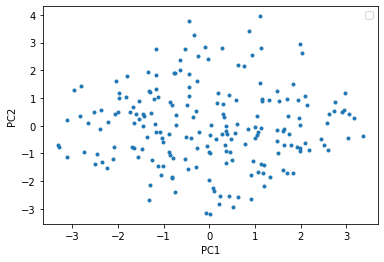

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(fpMtx)
# extract each component
pc = res.T
 
cum_cr = sum(pca.explained_variance_ratio_)
print("cumulative contribution ratio=%.2f" % cum_cr)
 
plt.figure()
plt.scatter(pc[0], pc[1], marker=".")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.savefig("pca_plot.png")
plt.show   